# Representation of data submission workflow components based on W3C-PROV

In [1]:
%load_ext autoreload
%autoreload 2

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/stephan/Repos/ENES-EUDAT/submission_forms')
from dkrz_forms import form_handler
from dkrz_forms import checks

from dkrz_forms.config import test_config
from dkrz_forms.config import workflow_steps

#print test_config.cordex_directory
project_dir = test_config.cordex_directory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
.dkrz_forms myconfig imported
Settings from ~/.dkrz_forms imported
Your submission form repository: /home/stephan/tmp/CORDEX
config/test_config imported


In [ ]:
test1 = {'a':'b'}
test2 = {'c':'d'}
test3 = {'d':'e'}
test1.update(test2,test3)
print test1


### generate empty Prov document and load submission workflow representation 

In [2]:
from prov.model import ProvDocument
d1 = ProvDocument()

my_last_name = "ki"
my_keyword = "sk1"
form_info_json_file = project_dir + "/" + my_last_name+"_"+my_keyword+".json"
workflow_form = form_handler.load_workflow_form(form_info_json_file)

## The Provenance Model used is based the PROV standard 

 described in https://www.w3.org/TR/prov-primer/
    

In [ ]:
from IPython.display import display, Image
Image(filename='key-concepts.png')

In [3]:
name_spaces={'sub':'http://enes.org/entities/ingest-workflow#sub',
            'ing':'http://enes.org/entities/ingest-workflow#ing',
            'qua':'http://enes.org/entities/ingest-workflow#qua',
            'pub':'http://enes.org/entities/ingest-workflow#pub',
            'wf':'http://enes.org/entities/ingest-workflow#wf',
            'dm':'http://enes.org/entities/ingest-workflow#dm',
            'dp':'http://enes.org/entities/ingest-workflow#dp',
            'node':'http://enes.org/entities/ingest-workflow#node',
            }

for key,value in name_spaces.iteritems():
    d1.add_namespace(key,value)


d1.add_namespace('foaf','http://xmlns.com/foaf/0.1/')

<Namespace: foaf {http://xmlns.com/foaf/0.1/}>

## Example name spaces 
  (from DOI: 10.3390/ijgi5030038 , mehr unter https://github.com/tsunagun/vocab/blob/master/all_20130125.csv)
    
    owl      Web Ontology Language    http://www.w3.org/2002/07/owl#
    dctype   DCMI Type Vocabulary     http://purl.org/dc/dcmitype/
    dco      DCO  Ontology            http://info.deepcarbon.net/schema#
    prov     PROV Ontology            http://www.w3.org/ns/prov#
    skos     Simple Knowledge
             Organization System      http://www.w3.org/2004/02/skos/core#
    foaf     FOAF Ontology            http://xmlns.com/foaf/0.1/
    vivo     VIVO Ontology            http://vivoweb.org/ontology/core#
    bibo     Bibliographic Ontology   http://purl.org/ontology/bibo/
    xsd      XML Schema Datatype      http://www.w3.org/2001/XMLSchema#
    rdf      Resource Description
             Framework                http://www.w3.org/1999/02/22-rdf-syntax-ns#
    rdfs     Resource Description
             Framework Schema         http://www.w3.org/2000/01/rdf-schema#    

In [4]:
# later: organize things in bundles
data_manager_peter = {'foaf:givenName':'Peter','foaf:mbox':'lenzen@dkrz.de'}
data_manager_stephan = {'foaf:givenName':'Stephan','foaf:mbox':'kindermann@dkrz.de'}
data_manager_katharina = {'foaf:givenName':'Katharina','foaf:mbox':'berger@dkrz.de'}
data_manager_hdh = {'foaf:givenName':'hdh','foaf:mbox':'hollweg@dkrz.de'}

d1.entity('node:form_template')
def add_stage(agent,activity,in_state,out_state):
    # in_stage exists, out_stage is generated
    #d1.agent(agent, data_manager_ats)
    d1.agent(agent)
    d1.activity(activity)
    d1.entity(out_state)
   
    d1.wasGeneratedBy(out_state,activity)
    d1.used(activity,in_state)
    d1.wasAssociatedWith(activity,agent)
    d1.wasDerivedFrom(out_state,in_state)

In [5]:
sf = workflow_form
data_provider = 'dp:'+'data_provider'
submission_agent = 'dm:'+'submission_manager'
ingest_agent = 'dm:'+'ingest_manager'
qua_agent = 'dm:'+'qua_manager' 
publication_agent =  'dm:'+'publication_manager'
archival_agent = 'dm:'+'archival_manager'

add_stage(agent=data_provider,activity='wf:submission',in_state="node:form_template",out_state='node:form_filled')
add_stage(agent=submission_agent,activity='wf:review',in_state="node:form_filled",out_state='node:review_report')
add_stage(agent=ingest_agent,activity='wf:ingest',in_state="node:form_filled",out_state='node:ingest_report')
add_stage(agent=qua_agent,activity='wf:qua',in_state="node:ingest_report",out_state='node:qua_report')
add_stage(agent=publication_agent,activity='wf:publication',in_state="node:ingest_report",out_state='node:pub_report')
add_stage(agent=archival_agent,activity='wf:archival',in_state="node:pub_report",out_state='node:arch_report')

## assign information to provenance graph nodes and edges

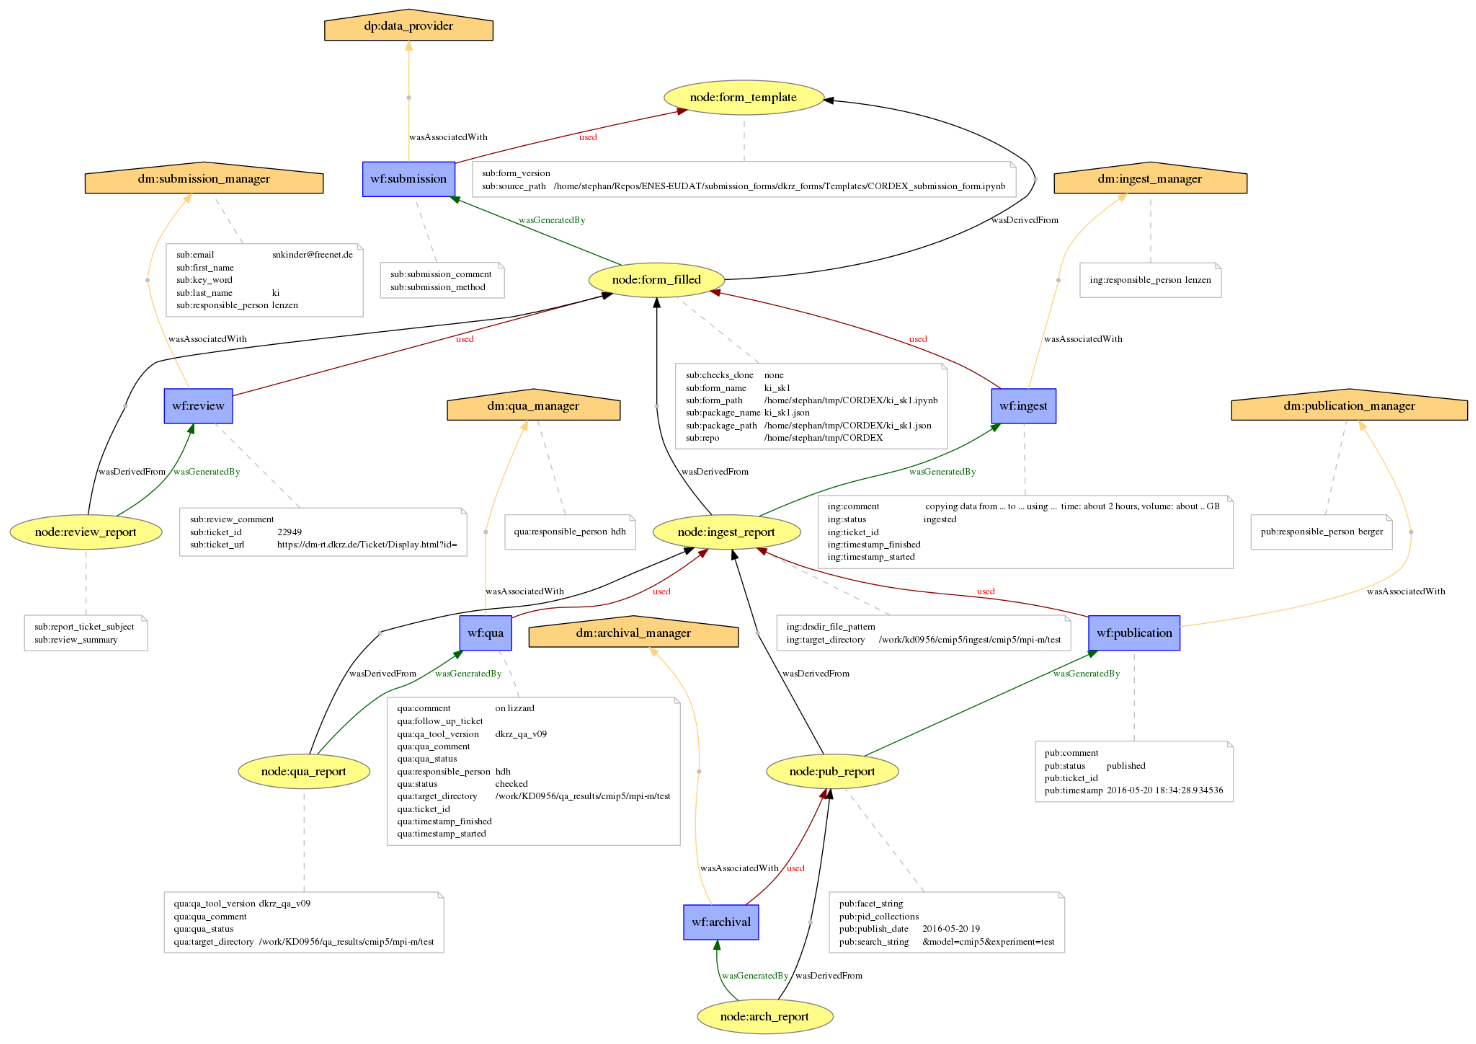

In [32]:
%matplotlib inline
d1.plot()



In [ ]:
#d1.wasAttributedTo(data_submission,'????')

# Transform submission object to a provenance graph 

In [ ]:
print d1.get_record('node:'+'form_template')[0]
wf_submission = d1.get_record('wf:submission')[0]
wf_submission.add_attributes({'sub:t':'trallala'})
print wf_submission

In [30]:
def get_prov_node(node_name):
    return d1.get_record(node_name)[0]

print get_prov_node('node:form_template')
#d1.get_records()
form_template = get_prov_node('node:form_template')
form_filled = get_prov_node('node:form_filled')
review_report = get_prov_node('node:review_report')
ingest_report =get_prov_node('node:ingest_report')
qua_report = get_prov_node('node:qua_report')
pub_report = get_prov_node('node:pub_report')
arch_report = get_prov_node('node:arch_report')

submission_activity = get_prov_node('wf:submission')
review_activity = get_prov_node('wf:review')
ingest_activity = get_prov_node('wf:ingest')
qua_activity = get_prov_node('wf:qua')
pub_activity = get_prov_node('wf:publication')

review_agent = get_prov_node('dm:submission_manager')
ingest_agent = get_prov_node('dm:ingest_manager')
qua_agent = get_prov_node('dm:qua_manager')
pub_agent = get_prov_node('dm:publication_manager')
archival_agent = get_prov_node('dm:archival_manager')

#review = d1.get_record('node:out1_rev')[0]
#ingest = d1.get_record('node:out1_ing')[0]
#check = d1.get_record('node:out1_qua')[0]
#publication = d1.get_record('node:out1_pub')[0]
#lta = d1.get_record('node:out1_arch')[0]


entity(node:form_template, [sub:form_version="", sub:source_path="/home/stephan/Repos/ENES-EUDAT/submission_forms/dkrz_forms/Templates/CORDEX_submission_form.ipynb"])


In [29]:
# todo: generalize mapping to activity and state attributes, e.g. using naming convention for attributes 
# or lists defined in workflow_steps or different namespace prefix ..
   
def get_atts_dict(atts_dict,form_object,namespace):
    '''
    get attributs from submission form object, 
    return attributes dictionary with keys prefixed by namespace
    '''              
    res_dict = {}
    for elem in atts_dict.keys():
        res_dict[elem] = form_object.__dict__[elem]
    
    pr_atts_dict = form_handler.prefix_dict(res_dict,namespace,atts_dict.keys())
    return pr_atts_dict

#form_template_atts_list = ['source_path','form_version']
#form_filled_atts_list = ['first_name','last_name','email','timestamp','checks_done']
#form_reviewed_atts_list = ['package_path','form_path','repo','status']
#submission_atts_list = ['comment']
#review_atts_list = ['review_comment']
#ingest_atts_list = ['comment','ticket_id']
#qua_atts_list = ['comment','ticket_id','qa_tool_version']
#publish_atts_list = ['comment','ticket_id']
#submission_manager_atts_list = ['responsible_person']
#ingest_manager_atts_list = ['responsible_person']
#qua_manager_atts_list = ['responsible_person']
#publication_manager_atts_list = ['responsible_person']
#archival_manager_atts_list = ['responsible_person']

#data_ingested_atts_list = ['target_directory','drsdir_file_pattern','status']
#data_checked_atts_list = ['target_directory','follow_up_ticket','status']
#data_published_atts_list = ['pid_collections','search_string','publish_date','status']
#data_archived_atts_list = ['']

#print sf.sub.__dict__
submission_agent_atts = get_atts_dict(workflow_steps.submission_agent,sf.sub,'sub')
print submission_agent_atts
submission_activity_atts = get_atts_dict(workflow_steps.submission_activity,sf.sub,'sub')
submission_form_template_atts = get_atts_dict(workflow_steps.submission_form_template,sf.sub,'sub')
submission_form_filled_atts = get_atts_dict(workflow_steps.submission_form_filled,sf.sub,'sub')
review_agent_atts = get_atts_dict(workflow_steps.review_agent,sf.sub,'sub')
review_report_atts = get_atts_dict(workflow_steps.review_report,sf.sub,'sub')
review_activity_atts = get_atts_dict(workflow_steps.review_activity,sf.sub,'sub')

ingest_agent_atts = get_atts_dict(workflow_steps.ingest_agent,sf.ing,'ing')
ingest_activity_atts = get_atts_dict(workflow_steps.ingest_activity,sf.ing,'ing')
ingest_report_atts = get_atts_dict(workflow_steps.ingest_report,sf.ing,'ing')

qua_agent_atts = get_atts_dict(workflow_steps.qua_agent,sf.qua,'qua')
qua_activity_atts = get_atts_dict(workflow_steps.qua,sf.qua,'qua')
qua_report_atts = get_atts_dict(workflow_steps.qua_report,sf.qua,'qua')

pub_agent_atts = get_atts_dict(workflow_steps.pub_agent,sf.pub,'pub')
pub_activity_atts = get_atts_dict(workflow_steps.pub_activity,sf.pub,'pub')
pub_report_atts = get_atts_dict(workflow_steps.pub_report,sf.pub,'pub')

#archival_manager_atts_list = get_atts_dict(archival_manager_atts_list,sf.arch)

#data_archived_atts = ....
print pub_report
        
#ing = form_handler.prefix_dict(sf.ing.__dict__,'ing',sf.ing.__dict__.keys())
#qua = form_handler.prefix_dict(sf.qua.__dict__,'qua',sf.qua.__dict__.keys())
#pub = form_handler.prefix_dict(sf.pub.__dict__,'pub',sf.pub.__dict__.keys())

{'sub:email': u'snkinder@freenet.de', 'sub:key_word': u'', 'sub:first_name': u'', 'sub:last_name': u'ki'}
{'pub:pid_collections': u'', 'pub:search_string': u'&model=cmip5&experiment=test', 'pub:facet_string': u'', 'pub:publish_date': u'2016-05-20 19'}


In [31]:
# data submit agent to be added ... 
submission_agent.add_attributes(submission_agent_atts)
submission_activity.add_attributes(submission_activity_atts)
form_template.add_attributes(submission_form_template_atts)
form_filled.add_attributes(submission_form_filled_atts)
review_agent.add_attributes(review_agent_atts)
review_activity.add_attributes(review_activity_atts)
review_report.add_attributes(review_report_atts)

ingest_agent.add_attributes(ingest_agent_atts)
ingest_activity.add_attributes(ingest_activity_atts)
ingest_report.add_attributes(ingest_report_atts)

qua_agent.add_attributes(qua_agent_atts)
qua_activity.add_attributes(qua_activity_atts)
qua_report.add_attributes(qua_report_atts)

pub_agent.add_attributes(pub_agent_atts)
pub_activity.add_attributes(pub_activity_atts)
pub_report.add_attributes(pub_report_atts)

#data_archived.add_attributes(data_archived_atts)

#check.add_attributes(qua)
#publication.add_attributes(pub)

In [ ]:
che_act = d1.get_record('subm:check') 
tst = che_act[0]
test_dict = {'subm:test':'test'}
tst.add_attributes(test_dict)

In [ ]:
print tst
tst.FORMAL_ATTRIBUTES
tst.

In [ ]:
che_act = d1.get_record('subm:check') 
#tst.formal_attributes
#tst.FORMAL_ATTRIBUTES
tst.add_attributes({'foaf:name':'tst'})
print tst.attributes
#for i in tst:
 #   print i
#tst.insert([('subm:givenName','sk')])

In [ ]:
import sys
sys.path.append('/home/stephan/Repos/ENES-EUDAT/submission_forms')
from dkrz_forms import form_handler
sf,repo = form_handler.init_form("CORDEX")



init_dict = sf.__dict__ 
sub_form = form_handler.prefix(sf,'subm',sf.__dict__.keys())            

sub_dict = sub_form.__dict__

#init_state = d1.get_record('subm:empty')[0]
#init_state.add_attributes(init_dict)

sub_state = d1.get_record('subm:out1_sub')[0]
init_state.add_attributes(sub_dict)


In [ ]:
tst_dict = {'test1':'val1','test2':'val2'}
tst = form_handler.submission_form(tst_dict) 
print tst.__dict__


In [ ]:
print result.__dict__

In [ ]:
dict_from_class(sf)